### Supervised Learning: Linear Regression

Jay Urbain, PhD

We will be working with the`Bike Sharing Demand` dataset from a prior Kaggle competition:  
https://www.kaggle.com/c/bike-sharing-demand 

**Assignment objective:** perform: 
- data analysis and visualization      
- preprocessing and feature engineering 
- fit a uni-variate linear regression model   
- fit a mutli-variate linear regression model   
- evauate the importances of each feature  
- identify a subset of features to maximize model performance .  

**Dataset Description:**
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

**Kaggle Objective:** 
You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

**Data Fields:**  
**datetime** - hourly date + timestamp    
**season** - 1: spring, 2: summer, 3: fall, 4: winter    
**holiday** - whether the day is (1) or is not (0) considered a holiday   
**workingday** - whether the day is neither a weekend nor holiday   
**weather** -    
&nbsp;&nbsp;1: Clear, Few clouds, Partly cloudy, Partly cloudy    
&nbsp;&nbsp;2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    
&nbsp;&nbsp;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      
&nbsp;&nbsp;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
**temp** - temperature in Celsius   
**atemp** - "feels like" temperature in Celsius   
**humidity** - relative humidity   
**windspeed** - wind speed   
**casual** - number of non-registered user rentals initiated   
**registered** - number of registered user rentals initiated   
**count** - number of total rentals  (casual + registered).  

**References**:   
- Fanaee-T, Hadi, and Gama, Joao, Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.
- https://www.kaggle.com/c/bike-sharing-demand (Kaggle site) 
- James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning, with applications in R, www.StatLearning.com, Springer-Verlag, New York. Chapter 4
- [scikit-learn](http://scikit-learn.org/stable/)  
- https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-1-c816ea9c51e1  

Carefully execute each cell in the notebook. Perform tasks and answer questions in the cell(s) below each bolded **question** in the in the notebook. Its important to carefully read each cell before proceeding.


#### Import libraries

*Note: If you haven't done so, make sure you create a conda environment (see week 1 notebook) and install your libraries after selecting that environment.*   

For this assignment you will need the following python libraries:  
- numpy  
- matplotlib   
- pandas   
- seaborn  
- sklearn   

It is customary to import your libraries towards the top of your notebook. If you are missing any of the libraries you can install them using:  
> conda install `library_name`  
or install from a specific collection:  
conda install -c anaconda `library_name`  
or using pip:  
pip install `library_name` 

In [106]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt # plotting package
import seaborn as sns           # more specialized plotting package built on matplotlib
from matplotlib import style
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# generate plots within notebook rather than external window
%matplotlib inline

import numpy as np  # linear algebra
import pandas as pd # data frame, dataprocessing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV # regression models

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

#### Import the data

In [2]:
import os
print(os.listdir("data/bike-sharing-dataset"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'sampleSubmission.csv', 'test.csv', 'train.csv']


In [3]:
# for mac or linux
!ls data/bike-sharing-dataset


sampleSubmission.csv test.csv             train.csv


We are interested in the train.csv and test.csv files generated for the Kaggle competition.

Create Pandas dataframes for the train and test data.

In [4]:
train=pd.read_csv(r'data/bike-sharing-dataset/train.csv')
test=pd.read_csv(r'data/bike-sharing-dataset/test.csv')
df_train=train.copy()
df_test=test.copy()

#### Analyze the data

The shape attribute of the data provides a tuple of the dataframes dimensions. 

In [5]:
df_train.shape

(10886, 12)

In [6]:
df_test.shape

(6493, 9)

Why does the test set have 3 fewer columns?

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Answer: Since this is a Kaggle competition, the test set provided does not include target variables for prediction. Note how casual + registered = count. We will need to take care and not include them as a feature (predictor) variable in our model.

For this exercise, we will need to construct our own test data from the training data supplied. If you would like to sumbit your results to Kaggle, you would use the supplied test data.

The info() method provides counts and data types for each field.

In [9]:
df = df_train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


We can also get to the type information using the 'dtypes' field which accesses the underlying numpy type for each column (Pandas Series) in the dataframe.

In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

An important preprocessing step is to determine if we have any missing or null values. If we do, we need to either remove them or impute some missing value.

https://scikit-learn.org/stable/modules/impute.html  

If the sum is zero, we have not problem.


In [11]:
df.isnull().sum()  

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Exploratory feature analysis

We should evaluate each predictor (feature) indvidually and with respect to the target variable `count`. We are interested in the distribution of the data and whether there is any correlation between features and the target variable.

For categorical data we can use value counts per category for a quantitative estimate. And either a barplot with value counts or a factorplot which counts values automatically to gain a better understanding of the distribution of each category.


**Distribution of categorical variables**

Lets start with `season`

season - 1: spring, 2: summer, 3: fall, 4: winter

In [12]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

Lets use the Seaborn factor plot to show this distribution graphically.

https://seaborn.pydata.org/tutorial.html


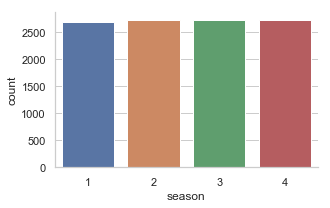

In [14]:
x = sns.catplot(x='season', data=df, kind='count', height=3, aspect=1.5)

*Observations:* We can observe that the samples are evenly distributed across seasons. This is good. We will not have to take special steps to deal with an unbalanced dataset.

`Holiday`

0    10575
1      311
Name: holiday, dtype: int64


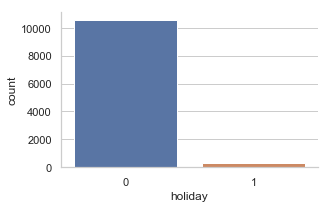

In [16]:
#holiday
print( df_train.holiday.value_counts() )
sns.catplot(x='holiday',data=df,kind='count',height=3,aspect=1.5) # majority of data is for non holiday days.

*Observations:* The vast majority of samples are non-holiday work days.

`Weather`

**weather** -    
&nbsp;&nbsp;1: Clear, Few clouds, Partly cloudy, Partly cloudy    
&nbsp;&nbsp;2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    
&nbsp;&nbsp;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds      
&nbsp;&nbsp;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Question** Generate counts for each weather category, a plot, and record your observations for weather.

In [17]:
#weather counts


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [107]:
# plot


*Observations:* 



`temp` - temperature in Celsius   

**Question** Generate counts for the first 10 samples, a plot, and record your observations for temp.


In [108]:
df.temp.value_counts().iloc[:10]

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
Name: temp, dtype: int64

In [109]:
# plot



We can observer the relationship of categorical attributes with resect to numeric (continuous) variables such as our target `count` with a category plot.

https://seaborn.pydata.org/tutorial/categorical.html

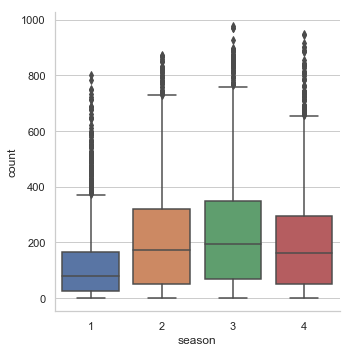

In [30]:
sns.catplot(x="season", y="count", kind="box", data=df);

**Question**: What can you observe about the distribution of `count` (number of riders) for each season? Can you come up with a hypothesis to explain the outliers?

In [31]:
# your answer here




**Distribution of continuous variables.**

We can use the dataframe describe method to quantify the distribution of continuous variables. *Note: this measures do not make a lot of sense for categorical variables discussed above*


In [32]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


We can show the continuous variable distributions with the box plot.

The box plot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Lets generate a boxplot for our target variable `count`

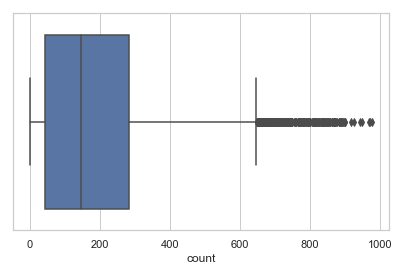

In [33]:
sns.boxplot(x="count", data=df);

**Question:** From the boxplot for `count` above, identify the approximate median
Also identify if the data is normally distributed and if there are any significant outliers.

Generate boxplots for each of the following numerical attributes. 

`temp` - temperature in Celsius   
`atemp` - "feels like" temperature in Celsius   
`humidity` - relative humidity   
`windspeed` - wind speed 

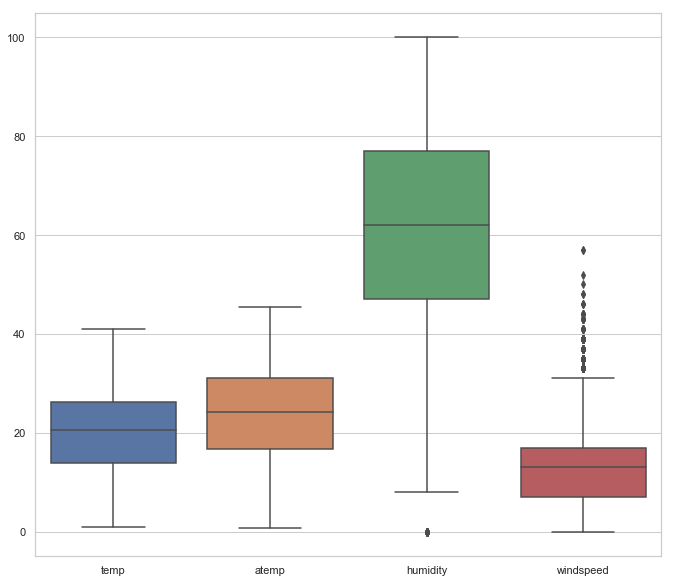

In [36]:
# just to visualize.
sns.boxplot(data=df[['temp', 'atemp', 'humidity', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

**Question:**

Record your observations for each continuous variable.



*Observations:*



We can also view distributions of continuous variables with histograms.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html


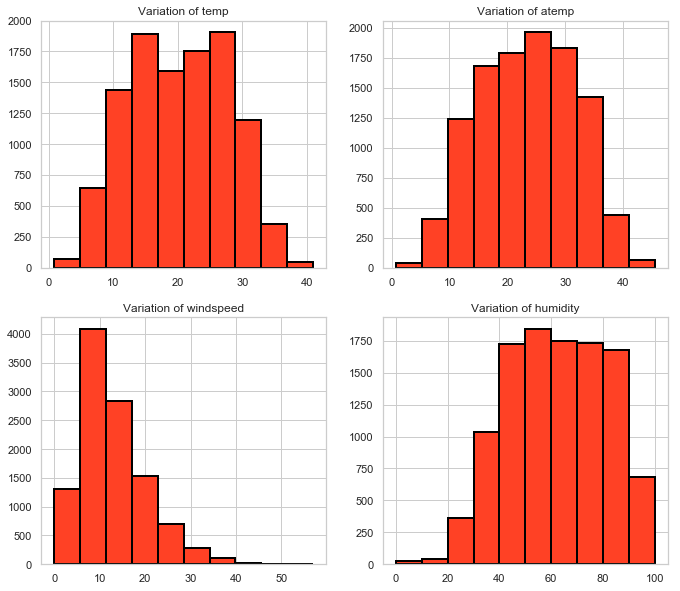

In [37]:
# can also be visulaized using histograms for all the continuous variables.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

**Visualizing statistical relations**

After reviewing the distributions for categorical and continuous variables. We would like to visualize relations between variables. Especially between each predictor and the target.

https://seaborn.pydata.org/generated/seaborn.heatmap.html


In [38]:
# Drop casual and registred since count + registred = count
df.drop(['casual','registered'],axis=1,inplace=True)

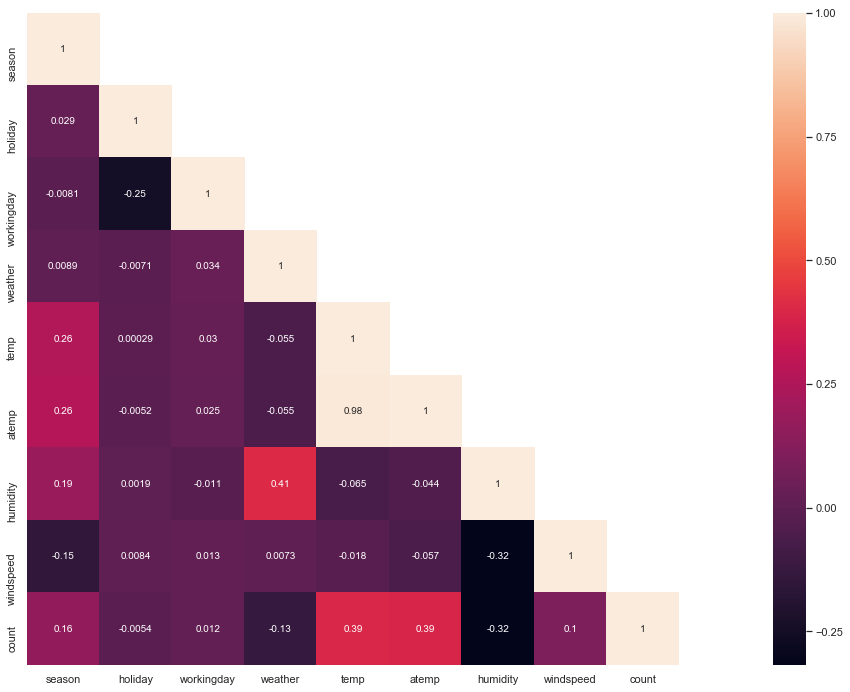

In [39]:
#correlation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
x = sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**Question:**  
1) Identify 3 pairs of variables with the highest correlation.    
2) Identify 3 predictor variables that have the highest correlation with the target variable `count`.  



Answer here:




**Question:** What kind of inferences can your draw from the corrleation matrix?

*Observations:



#### Feature Engineering

First, we have to replace categorical values with either the category type or one-hot (dummie encoding).

In [40]:
# one-hot encoding for season

season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()
season=pd.get_dummies(df_test['season'],prefix='season')
df_test=pd.concat([df_test,season],axis=1)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


**Question:** Perform one-hot encoding for weather on df and df_test datasets

In [41]:
# one-hot encode weather
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()
weather=pd.get_dummies(df_test['weather'],prefix='weather')
df_test=pd.concat([df_test,weather],axis=1)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [42]:
# we can now can drop weather and season.
df.drop(['season','weather'],inplace=True,axis=1)
df.head()
df_test.drop(['season','weather'],inplace=True,axis=1)
df_test.head()


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


Split the date and time as the time of day is expected to effect the number of bikes. For example, rush hour.

In [43]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [44]:
df_test["hour"] = [t.hour for t in pd.DatetimeIndex(df_test.datetime)]
df_test["day"] = [t.dayofweek for t in pd.DatetimeIndex(df_test.datetime)]
df_test["month"] = [t.month for t in pd.DatetimeIndex(df_test.datetime)]
df_test['year'] = [t.year for t in pd.DatetimeIndex(df_test.datetime)]
df_test['year'] = df_test['year'].map({2011:0, 2012:1})
df_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [45]:
# drop datetime column.
df.drop('datetime',axis=1,inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


#### Review our features

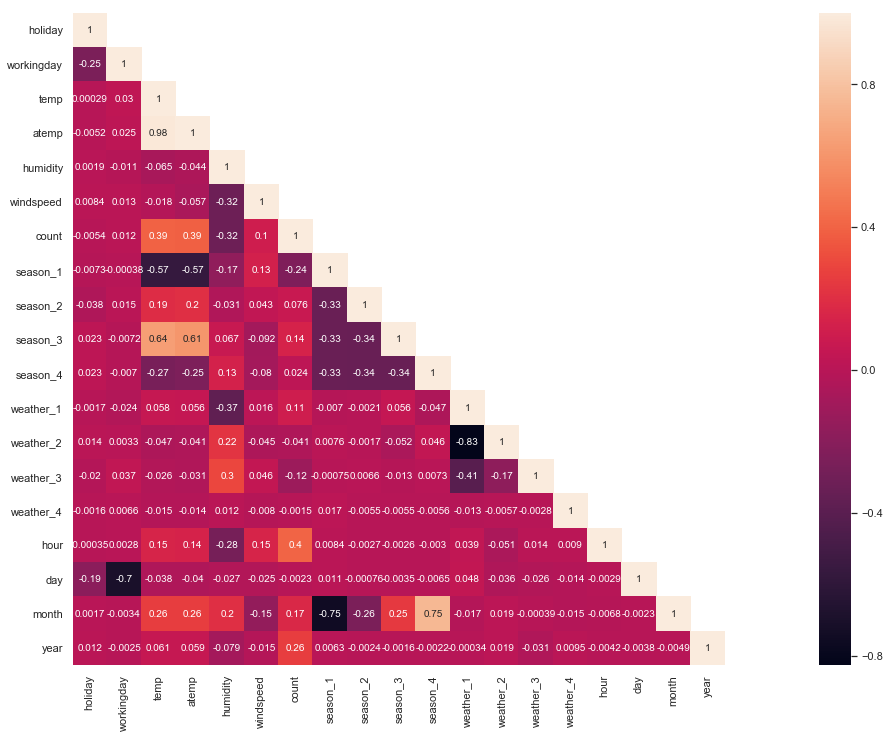

In [46]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [47]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [49]:
# verify we haven't inadvertantly added any null values
df.isna().sum()

holiday       0
workingday    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
season_1      0
season_2      0
season_3      0
season_4      0
weather_1     0
weather_2     0
weather_3     0
weather_4     0
hour          0
day           0
month         0
year          0
dtype: int64

#### Ordinary Least Squares (OLS) Regression

OLS regression fits a linear model (line in univariate regression, plane with two variates) by minimizing the residual sum of squares. Residuals are shown as red lines in the plot below. The residuals represent the difference between the predicted (point on line) and actual data (point). *Note: the plot below was generated from a different dataset using R. It is for illustrative purposes.*
    

Figure 4. Linear regression residuals


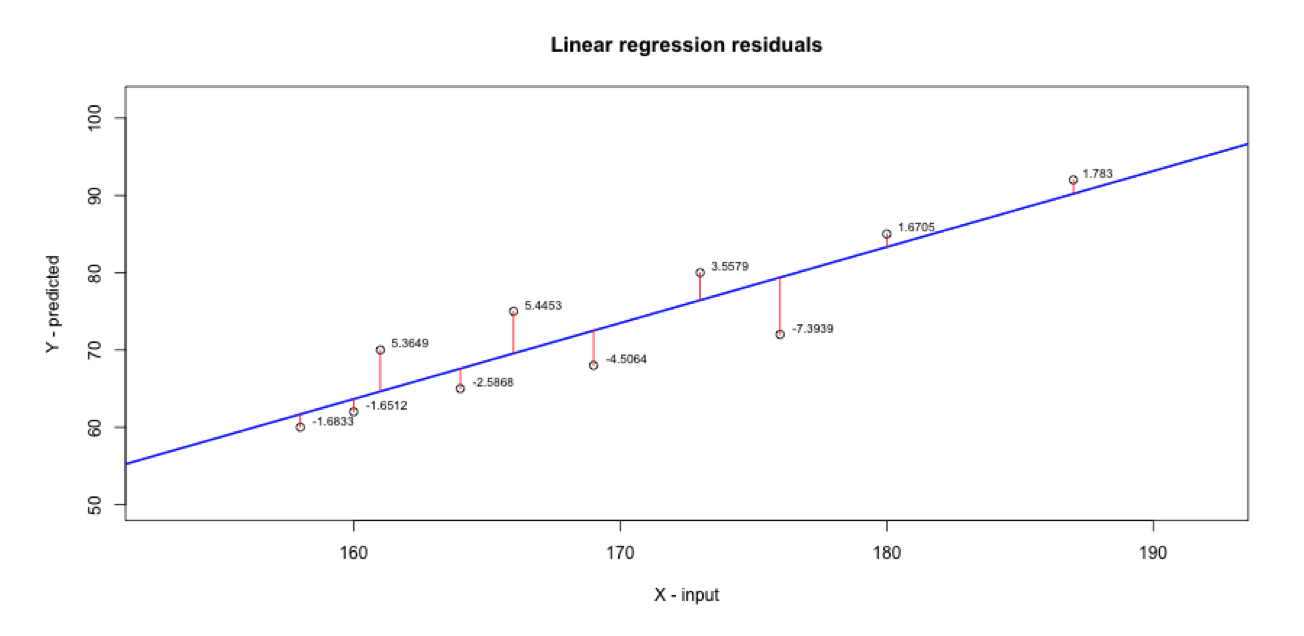

In [50]:
# Plot of linear regression residuals
from IPython.display import Image
print( 'Figure 4. Linear regression residuals' )
Image('linear_regression_residuals.png')

Best fit is defined as the line that minimizes the residual sum of squares:

$RSS=\sum_{i}^{m}(\hat{y}_i - {y}_i)^2$

Where $\hat{y}=\beta_0 + \beta_1x$

The least-square line approximating the set of points:

$ (x,y)_{1},(x,y)_{2},(x,y)_{3},...,(x,y)_{m}$

has the equation: $ \hat{Y} = \beta_{0} +\beta_{1}X $

I.e., the equation of a line: $Y=mx+b$


We can solve for our coefficients using gradient descent or the normal equation.

#### Using Numpy for a Univariate Linear Regression

Numpy has a OLS method in its linear algebra library. We'll use this for our univariate regression. We will move on to scikit-learn for Multivariate regression.

Numpy expects a *2D* array. The first dimension contains the different values. The second dimension contains the attribute number. In this case, the value is the temperature in celsius for that day. Since this is a single attribute, the second dimension of the array is 1. So we need to create a (10886,1) shape array. We can use numpy's vertical stack tool, *vstack*, to do this.

In [55]:
# Set up X as the temperature values
X = df.temp
print( X[:5])

# Use vstack to make X two-dimensional
X = np.vstack(df['temp'])
print( X[:5])

# Set up Y as the target count
Y = np.vstack(df['count']).astype('float')

print(Y[:5])

0    9.84
1    9.02
2    9.02
3    9.84
4    9.84
Name: temp, dtype: float64
[[9.84]
 [9.02]
 [9.02]
 [9.84]
 [9.84]]
[[16.]
 [40.]
 [32.]
 [13.]
 [ 1.]]


The linear regression model: $Y=mX+b$

can be represented in matrix form: $Y=A\beta$

where: $A = \begin{bmatrix}x & 1\end{bmatrix}$

and $\beta = \begin{bmatrix}m \\b\end{bmatrix}$

We can calculate the $A$ matrix using numpy. We can do this by creating a matrix in the form $[X 1]$,

In [56]:
# Create the X array in the form [X 1]
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )
print( X.shape )

print( Y.shape )

(10886, 2)
(10886, 1)


Now we can get the best fit values.

In [57]:
X = X.astype('float')

In [58]:
# Now calculate our coefficients for the best fit line
m, b = np.linalg.lstsq(X, Y)[0]
np.linalg.lstsq(X, Y)

(array([[9.17054048],
        [6.04621296]]),
 array([3.01599066e+08]),
 2,
 array([2264.02394874,   37.46221466]))

We can plot the data using the original data format of the Boston housing information. We performed the matrix transformations to utilize the numpy least square method.

Figure. 5, Count vs. Temp


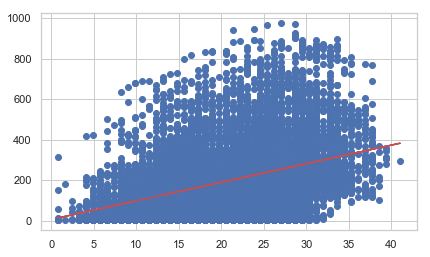

In [60]:
# Plot points, Count vs Temperature
plt.plot(df['temp'], df['count'],'o')

# Plot best fit line
x= df['temp']
plt.plot(x, m*x + b,'r',label='Best Fit Line')
print ('Figure. 5, Count vs. Temp')

#### Getting the error 

**Question** Calculate the RSS (as defined in step 3) for the univariate linear regression model of the Boston dataset created in step 4.** Use the cell below.

$RSS=\sum_{i}^{m}(\hat{y}_i - {y}_i)^2$

Where $\hat{y}=\beta_0 + \beta_1x$

In [63]:
# Use vstack to make X two-dimensional
X = df['temp']

# Set up Y as the house target price.
Y = df['count']

# RSS  

RSS =  301599066.3448093


We can calculate the [root mean square error](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) of our fitted regression line.

The result array has the residual squared error (RSS). For each element, it checks the the difference between the line (our prediction) and the true value, squares it, and returns the sum of all these. This is the RSS value.

The root mean squared error is similar to the standard deviation and allows us to compare the RMSE to the original data units. To find the root mean square error we divide by the number of elements and then take the square root. 

$RMSE=\sqrt{\dfrac{RSS}{N}}$

**Question** Calculate the RMSE. Use the cell below.

Note: numpy has a linear algebra package containing a function for calculating the !!!

In [64]:
import math
#RSME  


RSME =  166.44886243326746


Since the root mean square error (RMSE) corresponds to the standard deviation, we can say that the price of a house will not vary by more than 2 times the RMSE 95% of the time. 

**Question** How much will the `count` for riders vary 95% of the time?** Use the cell below. Is this a large variance?

Observation:

**Question** Calculate the TSS for the univariate linear regression model of the Boston dataset.** Use the cell below.

$TSS=\sum_{i}^{m}({y}_i - \bar{y})^2$

In [67]:
# TSS

357172913.6755453

**Question** Calcualte $R^2$ for the univariate linear regression model of the Boston dataset.** Use the cell below. Based on $R^2$, does our model do a good job explaining the variance in the data?

$R^2=\dfrac{TSS - RSS}{TSS} = 1 - \dfrac{RSS}{TSS}$

In [69]:
R2 =1-(RSS/TSS)
R2

(TSS-RSS)/TSS

0.15559367802794555

#### Scikit-learn for multivariate regression

*Scikit-learn* can be used for univariate or multivariate regression.

The [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class is called an estimator. 

Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the *fit()* and *predict()* methods. The *fit()* method is used to learn the parameters of a model, and the *predict()* method is used to predict the value of a response variable for a given predictor variable using the learned coefficients. 

In [71]:
# Import Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Create a LinearRegression object.

*Note: After typing in an object, you can press tab to see a list of methods*.

In [72]:
# Create a LinearRegression Object
lreg = LinearRegression()

LinearRegression functions:

- lreg.fit(): fits a linear model

- lreg.predict(): predict Y from X using the linear regression model coefficients

- lreg.score(): returns $R^2$, the [coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination)

Separate the bike sharing dataframe into feature (predictor) columns and the target column:

In [73]:
# Data Columns
X_multi = df.drop('count',1)

# Targets
Y_target = df['count']

**Question** Fit the linear regression model.

In [74]:
# Implement Linear Regression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Check the intercept and the number of coefficients.

In [75]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -50.91 


In [76]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 18 


[Scikit-learn Linear Model Documentation](http://scikit-learn.org/stable/modules/linear_model.html).

$ y(\beta,x) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p $

Where $\beta = (\beta_1, ...\beta_p)$ are the coefficients and $ \beta_0 $ as the intercept.

Create a DataFrame to examine the model and the estimated coefficients.

In [78]:
# Create a DataFrame from the Features
coeff_df = pd.DataFrame(df.columns)
coeff_df.columns = ['Features']

# Add a new column with the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
print ('Table 1. Multivariate coefficients')
coeff_df

Table 1. Multivariate coefficients


,Features,Coefficient Estimate
0,holiday,0.389340
1,workingday,4.276178
2,temp,5.238130
3,atemp,2.717360
4,humidity,-1.925788
5,windspeed,0.532523
6,count,16.142057
7,season_1,13.971614
8,season_2,-34.236902
9,season_3,4.123230


**Question**: Which coefficients, have the strongest correlation with respect to the target variable. Use the cell below. *Note: consider one-hot encoded values as one variable, i.e., season and weather*

Observations:



#### Training and Validation Sets


Separate training and test sets should be used to train and validate the performance of the model.

Samples for each set should be randomly selected.

Fortunately, scikit-learn has a built in function specifically for this called train_test_split.

The Scikit-learn [validation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) library has a function for this purpose. Below, we are creating separate training and tests sets, holding out 20% of the data for testing. 

In [79]:
# from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, test_size=0.2, random_state=0)


In [80]:
X_train.shape

(8708, 18)

Display the results of the data split.

In [81]:
# Print shapes of the training and testing data sets
# print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# #numpy expects matrix with dimension column
# X_train = X_train.values.reshape(X_train.shape[0],1)
# Y_train = Y_train.values.reshape(Y_train.shape[0],1)
# X_test = X_test.values.reshape(X_test.shape[0],1)
# Y_test = Y_test.values.reshape(Y_test.shape[0],1)

print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8708, 18) (2178, 18) (8708,) (2178,)


#### Predicting Demand

We can use our training set to build the model, and the test set to evaluate the performance of our model.

In [82]:
# Regression object
lreg = LinearRegression()

# Build a linear regression model on the training data only
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Perform prediction on both the training set and the test set.

In [83]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Calculate the mean square error for each:

In [85]:
print ("Fit a model X_train, and calculate RMSE with Y_train: %.2f"  % np.sqrt(np.mean((Y_train - pred_train) ** 2)) )
    
print ("Fit a model X_train, and calculate RMSE with X_test and Y_test: %.2f"  % np.sqrt(np.mean((Y_test - pred_test) ** 2)) )



Fit a model X_train, and calculate RMSE with Y_train: 140.50
Fit a model X_train, and calculate RMSE with X_test and Y_test: 141.25


**Question** Does our multivariate linear regression model reduce the RMSE with respect to the univariate model?

In [ ]:
*Observations:*

**Question** Does our multivariate linear regression model explain more the variance?

*Observations:*

#### Residual Plots

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable (x) on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. A good model fit will show data points randomly and evenly scattered around line zero. If there is some structure or pattern, that means your model is not capturing some aspect of the data. There could be an interaction between predictor variables that we are not considering, or the data may be inherently non-linear.

[Residual plots](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

Text(0.5, 1.0, 'Residual Plots')

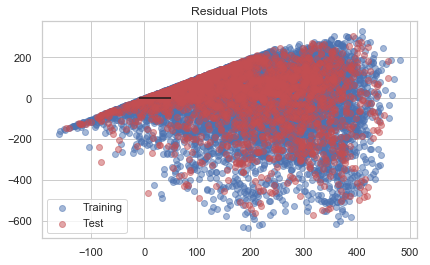

In [88]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Linear regression is a broad topic with many applications. More information can be found in the scikit-lear documentation:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model

**Question** Review Table 1. Multivariate coefficients. Think about the meaning of a linear regression model, i.e., the 
coefficient reflects the change in the target variable for a one unit change in an input variable, with all other 
variables held constant. Identify a subset of features and build a model with these features. See if you can reduce 
RMSE and increase $R^2$.** 

Document your results in the cell below.

**Question:** Identify additional feature engineering enhancements that improve the performance of your model.


**Optional:** Evaluate more complex models.

Note: Kaggle used the RMSLE not RMSE.

In [89]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# #model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# #evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 

In [90]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,Y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,Y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.3500073599969347,
  1.0499059262835069,
  0.3449720507750868,
  1.45348665653869,
  0.8770128608456939]}

In [93]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.350007
1,AdaBoostRegressor,1.049906
2,BaggingRegressor,0.344972
3,SVR,1.453487
4,KNeighborsRegressor,0.877013


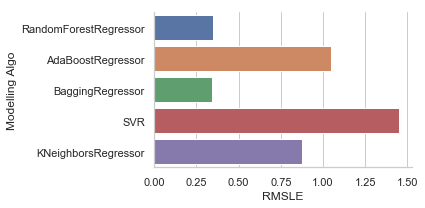

In [96]:
sns.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',height=3,aspect=2)

#### A little tuning

In [100]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,Y_train)
pred=clf_rf.predict(X_test)
print((np.sqrt(mean_squared_log_error(pred,Y_test))))

0.3342139301530091


In [101]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [103]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(X_train, Y_train)
pred=clf_knn.predict(X_test)
print((np.sqrt(mean_squared_log_error(pred,Y_test))))


0.8770128608456939


In [ ]:
clf_knn.best_params_

#### Random Foresets regressor provides the leat RMSLE.
